In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import math

In [2]:
with open("../../outputs/multi_variable_outputs/all_but_n4_Feb5.pkl", "rb") as f:
    vars = pickle.load(f)

In [3]:
#n4 handling
with open("../../outputs/n4/hgg_n4.pkl", "rb") as f:
    hgg_n4 = pickle.load(f)
with open("../../outputs/n4/hbb_n4.pkl", "rb") as f:
    hbb_n4 = pickle.load(f)
with open("../../outputs/n4/q347_n4.pkl", "rb") as f:
    q347_n4 = pickle.load(f)
with open("../../outputs/n4/q476_n4.pkl", "rb") as f:
    q476_n4 = pickle.load(f)
with open("../../outputs/n4/q68_n4.pkl", "rb") as f:
    q68_n4 = pickle.load(f)
with open("../../outputs/n4/q810_n4.pkl", "rb") as f:
    q810_n4 = pickle.load(f)
with open("../../outputs/n4/q1014_n4.pkl", "rb") as f:
    q1014_n4 = pickle.load(f)
with open("../../outputs/n4/q1418_n4.pkl", "rb") as f:
    q1418_n4 = pickle.load(f)
with open("../../outputs/n4/q1824_n4.pkl", "rb") as f:
    q1824_n4 = pickle.load(f)
with open("../../outputs/n4/q2432_n4.pkl", "rb") as f:
    q2432_n4 = pickle.load(f)
with open("../../outputs/n4/q32inf_n4.pkl", "rb") as f:
    q32inf_n4 = pickle.load(f)
with open("../../outputs/n4/n2_n3_d2_d3.pkl", "rb") as f:
    ecfs = pickle.load(f)

In [4]:
hgg = vars[0]['Hgg']['Hgg']
hbb = vars[0]['Hbb']['Hbb']

#n4
hgg['N4'] = hgg_n4[0]['Hgg']['Hgg']['N4']
hbb['N4'] = hbb_n4[0]['Hbb']['Hbb']['N4']

In [5]:
#signal scale factors
scalesHJ = ((44.99*(0.471*1000)*0.0817)/(hgg['entries']))
scalesHbb = ((44.99*(0.274*1000)*0.581)/(hbb['entries']))

In [6]:
#do the scaling 
hgg_entries = list(hgg.keys())
for i in range(1, len(hgg_entries)):
    hgg[hgg_entries[i]].view(flow=True)[:] *= scalesHJ

hbb_entries = list(hgg.keys())
for i in range(1, len(hbb_entries)):
    hbb[hbb_entries[i]].view(flow=True)[:] *= scalesHbb

In [7]:
#get the totals for each histogram
hgg_totals_dict = {}
for i in range(1, len(hgg_entries)):
    hgg_totals_dict[hgg_entries[i]] = hgg[hgg_entries[i]][0:len(hgg[hgg_entries[i]].view()):sum]

hbb_totals_dict = {}
for i in range(1, len(hbb_entries)):
    hbb_totals_dict[hbb_entries[i]] = hbb[hbb_entries[i]][0:len(hbb[hbb_entries[i]].view()):sum]

In [8]:
#get the true positive fractions forward
hgg_truth_dict_for = {}
for i in range(1, len(hgg_entries)):
    temp_list = []
    for j in range(1, len(hgg[hgg_entries[i]].view())+1):
        temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/hgg_totals_dict[hgg_entries[i]].value)
    hgg_truth_dict_for[hgg_entries[i]] = temp_list

hbb_truth_dict_for = {}
for i in range(1, len(hbb_entries)):
    temp_list = []
    for j in range(1, len(hbb[hbb_entries[i]].view())+1):
        temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/hbb_totals_dict[hbb_entries[i]].value)
    hbb_truth_dict_for[hbb_entries[i]] = temp_list

In [9]:
#get the true positive fractions backward
hgg_truth_dict_back = {}
for i in range(1, len(hgg_entries)):
    temp_list = []
    for j in range(1, len(hgg[hgg_entries[i]].view())+1):
        temp_list.append(hgg[hgg_entries[i]][len(hgg[hgg_entries[i]].view())-j:len(hgg[hgg_entries[i]].view()):sum].value/hgg_totals_dict[hgg_entries[i]].value)
    hgg_truth_dict_back[hgg_entries[i]] = temp_list

hbb_truth_dict_back = {}
for i in range(1, len(hbb_entries)):
    temp_list = []
    for j in range(1, len(hbb[hbb_entries[i]].view())+1):
        temp_list.append(hbb[hbb_entries[i]][len(hbb[hbb_entries[i]].view())-j:len(hbb[hbb_entries[i]].view()):sum].value/hbb_totals_dict[hbb_entries[i]].value)
    hbb_truth_dict_back[hbb_entries[i]] = temp_list

In [10]:
#2017 integrated luminosity and QCD cross sections
IL = 44.99
xs_300to470 = 6833
xs_470to600 = 549.5
xs_600to800 = 156.5
xs_800to1000 = 26.22
xs_1000to1400 = 7.475
xs_1400to1800 = 0.6482
xs_1800to2400 = 0.08742
xs_2400to3200 = 0.005237
xs_3200toInf = 0.0001353

In [11]:
#combine the qcds into a dictionary
qcd_dict = {}
qcd_dict['q347'] = vars[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']
qcd_dict['q476'] = vars[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']
qcd_dict['q68'] = vars[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']
qcd_dict['q810'] = vars[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']
qcd_dict['q1014'] = vars[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']
qcd_dict['q1418'] = vars[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']
qcd_dict['q1824'] = vars[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']
qcd_dict['q2432'] = vars[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']
qcd_dict['q32inf'] = vars[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']

#n4
qcd_dict['q347']['N4'] = q347_n4[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']['N4']
qcd_dict['q476']['N4'] = q476_n4[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']['N4']
qcd_dict['q68']['N4'] = q68_n4[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']['N4']
qcd_dict['q810']['N4'] = q810_n4[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']['N4']
qcd_dict['q1014']['N4'] = q1014_n4[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']['N4']
qcd_dict['q1418']['N4'] = q1418_n4[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']['N4']
qcd_dict['q1824']['N4'] = q1824_n4[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']['N4']
qcd_dict['q2432']['N4'] = q2432_n4[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']['N4']
qcd_dict['q32inf']['N4'] = q32inf_n4[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']['N4']

In [12]:
#QCD scale factors dictionary
qcd_sf_dict = {}
qcd_sf_dict['scales300to470'] = (((xs_300to470*1000)*IL)/(qcd_dict['q347']['entries']))
qcd_sf_dict['scales470to600'] = (((xs_470to600*1000)*IL)/(qcd_dict['q476']['entries']))
qcd_sf_dict['scales600to800'] = (((xs_600to800*1000)*IL)/(qcd_dict['q68']['entries']))
qcd_sf_dict['scales800to1000'] = (((xs_800to1000*1000)*IL)/(qcd_dict['q810']['entries']))
qcd_sf_dict['scales1000to1400'] = (((xs_1000to1400*1000)*IL)/(qcd_dict['q1014']['entries']))
qcd_sf_dict['scales1400to1800'] = (((xs_1400to1800*1000)*IL)/(qcd_dict['q1418']['entries']))
qcd_sf_dict['scales1800to2400'] = (((xs_1800to2400*1000)*IL)/(qcd_dict['q1824']['entries']))
qcd_sf_dict['scales2400to3200'] = (((xs_2400to3200*1000)*IL)/(qcd_dict['q2432']['entries']))
qcd_sf_dict['scales3200toInf'] = (((xs_3200toInf*1000)*IL)/(qcd_dict['q32inf']['entries']))

In [13]:
#scale all the qcd values
entries = list(qcd_dict['q347'].keys())
for i in range(0, len(qcd_dict)):
    qcd_range = list(qcd_dict.keys())[i]
    qcd_scales = list(qcd_sf_dict.keys())[i]
    for j in range(1, len(entries)):
        qcd_dict[qcd_range][entries[j]].view(flow=True)[:] *= qcd_sf_dict[qcd_scales]

In [14]:
#combine the qcds into individual variable fields
qcd_vars = {}
for i in range(1, len(entries)):
    temp_hist = qcd_dict['q347'][entries[i]]
    for j in range(1, len(qcd_dict)):
        temp_hist += qcd_dict[list(qcd_dict.keys())[j]][entries[i]]
    qcd_vars[entries[i]] = temp_hist

In [15]:
#totals for each qcd hist
qcd_totals_dict = {}
for i in range(1, len(entries)):
    qcd_totals_dict[entries[i]] = qcd_vars[entries[i]][0:len(qcd_vars[entries[i]].view()):sum]

In [17]:
#false positive fractions for each qcd variable forward
qcd_false_positive_dict_for = {}
for i in range(1, len(entries)):
    temp_list = []
    for j in range(1, len(qcd_vars[entries[i]].view())+1):
        temp_list.append(qcd_vars[entries[i]][0:j:sum].value/qcd_totals_dict[entries[i]].value)
    qcd_false_positive_dict_for[entries[i]] = temp_list

#false positive fractions for each qcd variable backward
qcd_false_positive_dict_back = {}
for i in range(1, len(entries)):
    temp_list = []
    for j in range(1, len(qcd_vars[entries[i]].view())+1):
        temp_list.append(qcd_vars[entries[i]][len(qcd_vars[entries[i]].view())-j:len(qcd_vars[entries[i]].view()):sum].value/qcd_totals_dict[entries[i]].value)
    qcd_false_positive_dict_back[entries[i]] = temp_list

In [18]:
#make the s over root b dict for hgg forward
hgg_s_over_rb_dict_for = {}
for i in range(1, len(hgg_entries)):
    temp_list = []
    for j in range(1, len(hgg[hgg_entries[i]].view())+1):
        try:
            temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/math.sqrt(qcd_vars[hgg_entries[i]][0:j:sum].value))
        except:
            continue
    hgg_s_over_rb_dict_for[hgg_entries[i]] = temp_list

#make the s over root b dict for hgg backward
hgg_s_over_rb_dict_back = {}
for i in range(1, len(hgg_entries)):
    temp_list = []
    for j in range(1, len(hgg[hgg_entries[i]].view())+1):
        try:
            temp_list.append(hgg[hgg_entries[i]][len(hgg[hgg_entries[i]].view())-j:len(hgg[hgg_entries[i]].view()):sum].value/math.sqrt(qcd_vars[hgg_entries[i]][len(hgg[hgg_entries[i]].view())-j:len(hgg[hgg_entries[i]].view()):sum].value))
        except:
            continue
    hgg_s_over_rb_dict_back[hgg_entries[i]] = temp_list

In [19]:
#make the s over root b dict for hbb forward
hbb_s_over_rb_dict_for = {}
for i in range(1, len(hbb_entries)):
    temp_list = []
    for j in range(1, len(hbb[hbb_entries[i]].view())+1):
        try:
            temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/math.sqrt(qcd_vars[hbb_entries[i]][0:j:sum].value))
        except:
            continue
    hbb_s_over_rb_dict_for[hbb_entries[i]] = temp_list

#make the s over root b dict for hbb backward
hbb_s_over_rb_dict_back = {}
for i in range(1, len(hbb_entries)):
    temp_list = []
    for j in range(1, len(hbb[hbb_entries[i]].view())+1):
        try:
            temp_list.append(hbb[hbb_entries[i]][len(hbb[hbb_entries[i]].view())-j:len(hbb[hbb_entries[i]].view()):sum].value/math.sqrt(qcd_vars[hbb_entries[i]][len(hbb[hbb_entries[i]].view())-j:len(hbb[hbb_entries[i]].view()):sum].value))
        except:
            continue
    hbb_s_over_rb_dict_back[hbb_entries[i]] = temp_list

In [32]:
# fig, ax = plt.subplots()

# ax.plot(hgg['Color_Ring'].to_numpy()[1][1:]/hgg['Color_Ring'].to_numpy()[1][-1], hgg_s_over_rb_dict_back['Color_Ring'], linewidth=2.0, label='Color Ring')
# ax.plot(hgg['Color_Ring_Var'].to_numpy()[1][1:]/hgg['Color_Ring_Var'].to_numpy()[1][-1], hgg_s_over_rb_dict['Color_Ring_Var'], linewidth=2.0, label='Color_Ring_Var')
# ax.plot(hgg['D2'].to_numpy()[1][1:]/hgg['D2'].to_numpy()[1][-1], hgg_s_over_rb_dict['D2'], linewidth=2.0, label='D2')
# ax.plot(hgg['D3'].to_numpy()[1][1:]/hgg['D3'].to_numpy()[1][-1], hgg_s_over_rb_dict['D3'], linewidth=2.0, label='D3')
# ax.plot(hgg['U1'].to_numpy()[1][1:]/hgg['U1'].to_numpy()[1][-1], hgg_s_over_rb_dict['U1'], linewidth=2.0, label='U1')
# ax.plot(hgg['U2'].to_numpy()[1][1:]/hgg['U2'].to_numpy()[1][-1], hgg_s_over_rb_dict['U2'], linewidth=2.0, label='U2')
# ax.plot(hgg['U3'].to_numpy()[1][1:]/hgg['U3'].to_numpy()[1][-1], hgg_s_over_rb_dict['U3'], linewidth=2.0, label='U3')
# ax.plot(hgg['MRatio'].to_numpy()[1][1:]/hgg['MRatio'].to_numpy()[1][-1], hgg_s_over_rb_dict['MRatio'], linewidth=2.0, label='MRatio')
# ax.plot(hgg['N2'].to_numpy()[1][1:]/hgg['N2'].to_numpy()[1][-1], hgg_s_over_rb_dict['N2'], linewidth=2.0, label='N2')
# ax.plot(hgg['N3'].to_numpy()[1][1:]/hgg['N3'].to_numpy()[1][-1], hgg_s_over_rb_dict['N3'], linewidth=2.0, label='N3')
# ax.plot(hgg['nConstituents'].to_numpy()[1][1:]/hgg['nConstituents'].to_numpy()[1][-1], hgg_s_over_rb_dict['nConstituents'], linewidth=2.0, label='nConstituents')
# ax.plot(hgg['Btag'].to_numpy()[1][1:]/hgg['Btag'].to_numpy()[1][-1], hgg_s_over_rb_dict['Btag'], linewidth=2.0, label='Btag')



# plt.xlabel("Variable Value")
# plt.ylabel("S/sqrt(B)")
# plt.title('Hgg')


# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend()

In [ ]:
# fig, ax = plt.subplots()

# ax.plot(hbb['Color_Ring'].to_numpy()[1][1:]/hbb['Color_Ring'].to_numpy()[1][-1], hbb_s_over_rb_dict['Color_Ring'], linewidth=2.0, label='Color Ring')
# ax.plot(hbb['Color_Ring_Var'].to_numpy()[1][1:]/hbb['Color_Ring_Var'].to_numpy()[1][-1], hbb_s_over_rb_dict['Color_Ring_Var'], linewidth=2.0, label='Color_Ring_Var')
# ax.plot(hbb['D2'].to_numpy()[1][1:]/hbb['D2'].to_numpy()[1][-1], hbb_s_over_rb_dict['D2'], linewidth=2.0, label='D2')
# ax.plot(hbb['D3'].to_numpy()[1][1:]/hbb['D3'].to_numpy()[1][-1], hbb_s_over_rb_dict['D3'], linewidth=2.0, label='D3')
# ax.plot(hbb['U1'].to_numpy()[1][1:]/hbb['U1'].to_numpy()[1][-1], hbb_s_over_rb_dict['U1'], linewidth=2.0, label='U1')
# ax.plot(hbb['U2'].to_numpy()[1][1:]/hbb['U2'].to_numpy()[1][-1], hbb_s_over_rb_dict['U2'], linewidth=2.0, label='U2')
# ax.plot(hbb['U3'].to_numpy()[1][1:]/hbb['U3'].to_numpy()[1][-1], hbb_s_over_rb_dict['U3'], linewidth=2.0, label='U3')
# ax.plot(hbb['MRatio'].to_numpy()[1][1:]/hbb['MRatio'].to_numpy()[1][-1], hbb_s_over_rb_dict['MRatio'], linewidth=2.0, label='MRatio')
# ax.plot(hbb['N2'].to_numpy()[1][1:]/hbb['N2'].to_numpy()[1][-1], hbb_s_over_rb_dict['N2'], linewidth=2.0, label='N2')
# ax.plot(hbb['N3'].to_numpy()[1][1:]/hbb['N3'].to_numpy()[1][-1], hbb_s_over_rb_dict['N3'], linewidth=2.0, label='N3')
# ax.plot(hbb['nConstituents'].to_numpy()[1][1:]/hbb['nConstituents'].to_numpy()[1][-1], hbb_s_over_rb_dict['nConstituents'], linewidth=2.0, label='nConstituents')
# ax.plot(hbb['Btag'].to_numpy()[1][1:]/hbb['Btag'].to_numpy()[1][-1], hbb_s_over_rb_dict['Btag'], linewidth=2.0, label='Btag')



# plt.xlabel("Variable Value")
# plt.ylabel("S/sqrt(B)")
# plt.title('Hbb')


# plt.xlim(0, 1)
# plt.ylim(0, 1)
# plt.legend()

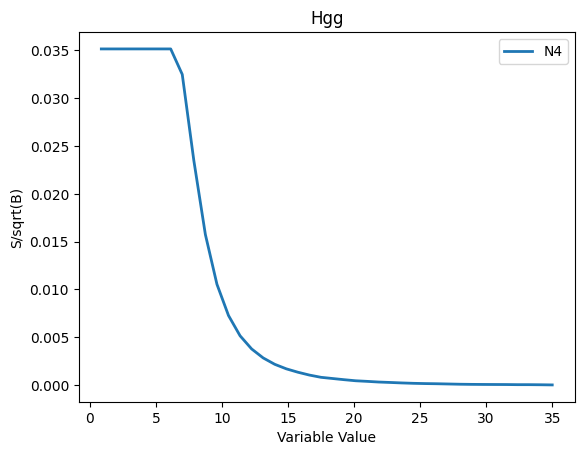

In [41]:
fig, ax = plt.subplots()

# ax.plot(np.flip(hgg['Color_Ring'].to_numpy()[1][1:]), hgg_s_over_rb_dict_back['Color_Ring'], linewidth=2.0, label='Color Ring')
# ax.plot(hgg['Color_Ring_Var'].to_numpy()[1][1:].to_numpy()[1][-1], hgg_s_over_rb_dict['Color_Ring_Var'], linewidth=2.0, label='Color_Ring_Var')
# ax.plot(hgg['D2'].to_numpy()[1][1:], hgg_s_over_rb_dict_for['D2'], linewidth=2.0, label='D2')
# ax.plot(hgg['D3'].to_numpy()[1][1:], hgg_s_over_rb_dict['D3'], linewidth=2.0, label='D3')
# ax.plot(hgg['U1'].to_numpy()[1][1:], hgg_s_over_rb_dict['U1'], linewidth=2.0, label='U1')
# ax.plot(hgg['U2'].to_numpy()[1][1:], hgg_s_over_rb_dict['U2'], linewidth=2.0, label='U2')
# ax.plot(hgg['U3'].to_numpy()[1][1:], hgg_s_over_rb_dict['U3'], linewidth=2.0, label='U3')
# ax.plot(hgg['MRatio'].to_numpy()[1][1:], hgg_s_over_rb_dict['MRatio'], linewidth=2.0, label='MRatio')
# ax.plot(hgg['N2'].to_numpy()[1][1:], hgg_s_over_rb_dict['N2'], linewidth=2.0, label='N2')
# ax.plot(hgg['N3'].to_numpy()[1][1:], hgg_s_over_rb_dict_for['N3'], linewidth=2.0, label='N3')
# ax.plot(hgg['nConstituents'].to_numpy()[1][1:], hgg_s_over_rb_dict['nConstituents'], linewidth=2.0, label='nConstituents')
# ax.plot(hgg['Btag'].to_numpy()[1][1:], hgg_s_over_rb_dict['Btag'], linewidth=2.0, label='Btag')
# ax.plot(np.flip(hgg['N4'].to_numpy()[1][1:]), hgg_s_over_rb_dict_back['N4'], linewidth=2.0, label='N4')

plt.xlabel("Variable Value")
plt.ylabel("S/sqrt(B)")
plt.title('Hgg')

plt.legend()

In [ ]:
# fig, ax = plt.subplots()

# ax.plot(hbb['Color_Ring'].to_numpy()[1][1:], hbb_s_over_rb_dict['Color_Ring'], linewidth=2.0, label='Color Ring')
# ax.plot(hbb['Color_Ring_Var'].to_numpy()[1][1:].to_numpy()[1][-1], hbb_s_over_rb_dict['Color_Ring_Var'], linewidth=2.0, label='Color_Ring_Var')
# ax.plot(hbb['D2'].to_numpy()[1][1:], hbb_s_over_rb_dict['D2'], linewidth=2.0, label='D2')
# ax.plot(hbb['D3'].to_numpy()[1][1:], hbb_s_over_rb_dict['D3'], linewidth=2.0, label='D3')
# ax.plot(hbb['U1'].to_numpy()[1][1:], hbb_s_over_rb_dict['U1'], linewidth=2.0, label='U1')
# ax.plot(hbb['U2'].to_numpy()[1][1:], hbb_s_over_rb_dict['U2'], linewidth=2.0, label='U2')
# ax.plot(hbb['U3'].to_numpy()[1][1:], hbb_s_over_rb_dict['U3'], linewidth=2.0, label='U3')
# ax.plot(hbb['MRatio'].to_numpy()[1][1:], hbb_s_over_rb_dict['MRatio'], linewidth=2.0, label='MRatio')
# ax.plot(hbb['N2'].to_numpy()[1][1:], hbb_s_over_rb_dict['N2'], linewidth=2.0, label='N2')
# ax.plot(hbb['N3'].to_numpy()[1][1:], hbb_s_over_rb_dict['N3'], linewidth=2.0, label='N3')
# ax.plot(hbb['nConstituents'].to_numpy()[1][1:], hbb_s_over_rb_dict['nConstituents'], linewidth=2.0, label='nConstituents')
# ax.plot(hbb['Btag'].to_numpy()[1][1:], hbb_s_over_rb_dict['Btag'], linewidth=2.0, label='Btag')

# plt.xlabel("Variable Value")
# plt.ylabel("S/sqrt(B)")
# plt.title('Hgg')

# plt.legend()

In [23]:
plot_names = hgg_entries
plot_names.remove('SDmass')
plot_names.remove('Mass')

In [50]:
for i in range(1, len(plot_names)):
    fig, ax = plt.subplots()
    ax.plot(np.flip(hgg[plot_names[i]].to_numpy()[1][1:]), hgg_s_over_rb_dict_back[plot_names[i]], linewidth=2.0, label=plot_names[i])
    plt.xlabel("Variable Value")
    plt.ylabel("S/sqrt(B)")
    plt.title('Hgg')
    plt.legend()
    plt_name = 'hgg_' + plot_names[i]
    plt.savefig('./plots/hgg_backward/' + plt_name + '.pdf', format='pdf')
    plt.close(fig)

In [57]:
for i in range(10, len(plot_names)):
    fig, ax = plt.subplots()
    ax.plot(np.flip(hbb[plot_names[i]].to_numpy()[1][1:]), hbb_s_over_rb_dict_back[plot_names[i]], linewidth=2.0, label=plot_names[i])
    plt.xlabel("Variable Value")
    plt.ylabel("S/sqrt(B)")
    plt.title('Hbb')
    plt.legend()
    plt_name = 'hbb_' + plot_names[i]
    plt.savefig('./plots/hbb_backward/' + plt_name + '.pdf', format='pdf')
    plt.close(fig)

In [56]:
i

9